# Исследование надежности заемщиков банка


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга 

## Описание данных

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход

purpose — цель получения кредита

## Откроем таблицу и изучим общую информацию о данных

In [ ]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Выполним предобработку данных

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Заполним пропуски в столбце "total_income" медианными значениями для каждого типа занятости "income_type".

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработаем аномальные значения

In [ ]:
data['days_employed'] = data['days_employed'].abs()

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце "children" есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма.

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Заполним пропуски в столбце "days_employed" медианными значениями для каждого типа занятости "income_type".

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Измененим типы данных

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработаем дубликаты  и неявные дубликаты

In [ ]:
data.duplicated().sum()

54

In [ ]:
data = data.drop_duplicates()

In [ ]:
data['education'] = data['education'].str.lower()

### Разобьем данные на категории

На основании диапазонов, указанных ниже, создадим столбец с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass   


In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

### Рассмотрим уникальные цели взятия кредита

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Разобьем цели на 4 категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные

Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
data['debt'].value_counts(normalize=True)

0    0.918868
1    0.081132
Name: debt, dtype: float64

In [ ]:
data['children'].value_counts(normalize=True)

0    0.660811
1    0.225267
2    0.096121
3    0.015458
4    0.001921
5    0.000422
Name: children, dtype: float64

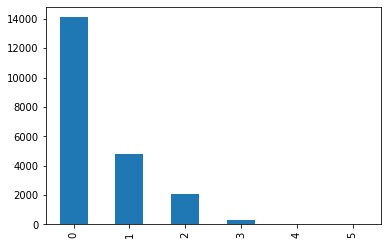

In [ ]:
data['children'].value_counts().plot(kind='bar');

In [ ]:
def data_share(row):
  data_pivot = data.pivot_table(index = [row], columns = 'debt', values = 'gender', aggfunc = 'count').copy()
  data_pivot['Всего кредитополучателей'] = data_pivot[0] + data_pivot[1]
  data_pivot['Всего должников'] = data_pivot[1]
  data_pivot['Доля должников'] = data_pivot[1] / (data_pivot[0] + data_pivot[1])
  return data_pivot

data_share('children')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
children,,,,,
0,13044.0,1063.0,14107.0,1063.0,0.075353
1,4365.0,444.0,4809.0,444.0,0.092327
2,1858.0,194.0,2052.0,194.0,0.094542
3,303.0,27.0,330.0,27.0,0.081818
4,37.0,4.0,41.0,4.0,0.097561
5,9.0,NaN,NaN,NaN,NaN


**Вывод:** 
1. У клиентов без детей реже случаются просрочки по выплате кредитов. Процент должников среди клиентов без детей равен 7%, тогда как у клиентов с детьми этот показатель равен 8-9%. 
2. Исключение составляют клиенты, у которых 5 детей. В этой категории 100% клиентов исправно выплачивают кредиты, однако число таких клиентов крайне незначительно. Составляет 0,04% от всех клиентов.

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
data['family_status'].unique()# Ваш код будет здесь. Вы можете создавать новые ячейки.

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [ ]:
data['family_status'].value_counts(normalize=True)

женат / замужем          0.574574
гражданский брак         0.194210
Не женат / не замужем    0.130972
в разводе                0.055696
вдовец / вдова           0.044547
Name: family_status, dtype: float64

Разделим подкатегории столбца "семейное положение" на две категории: "женат / замужем" и "не женат / не замужем". Вначале внесём клиентов, живущих в гражданском браке, в категорию "женат / замужем".

In [ ]:
def fam_category(f):
    if (f == 'женат / замужем') or (f == 'гражданский брак'):
        return 'женат / замужем'
    return 'не женат / не замужем'

data['family_status_category'] = data['family_status'].apply(fam_category)

In [ ]:
data_share('family_status_category')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
family_status_category,,,,,
женат / замужем,15100,1312,16412,1312,0.079942
не женат / не замужем,4516,420,4936,420,0.085089


Теперь отнесём кредитополучателей, живущих в гражданском браке, в категорию "не женат / не замужем". И сравним с результатом предыдущей таблицы.

In [ ]:
def fam_category(f):
    if (f == 'женат / замужем'):
        return 'женат / замужем'
    return 'не женат / не замужем'

data['family_status_category'] = data['family_status'].apply(fam_category)

In [ ]:
data_share('family_status_category')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
family_status_category,,,,,
женат / замужем,11339,927,12266,927,0.075575
не женат / не замужем,8277,805,9082,805,0.088637


В долевом значении результаты одинаковы. Посмотрим отдельно на долю должников среди клиентов, состоящих в гражданском браке.

In [ ]:
data_share('family_status')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
family_status,,,,,
Не женат / не замужем,2523,273,2796,273,0.097639
в разводе,1105,84,1189,84,0.070648
вдовец / вдова,888,63,951,63,0.066246
гражданский брак,3761,385,4146,385,0.092861
женат / замужем,11339,927,12266,927,0.075575


**Вывод:** 
1. Кредитному отделу следует с осторожностью относиться к клиентам, которые в гражданском браке, либо не состоят в браке. 
2. У клиентов, которые состоят в браке или разведены, меньше задолженностей по кредитам, чем у клиентов, состоящих в гражданском браке или неженатых. 
3. У вдовцов реже всего случаются просрочки по кредитам. 

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
data_share('total_income_category')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
total_income_category,,,,,
A,23,2,25,2,0.080000
B,4660,354,5014,354,0.070602
C,14585,1353,15938,1353,0.084891
D,328,21,349,21,0.060172
E,20,2,22,2,0.090909


In [ ]:
data['total_income_category'].value_counts(normalize=True)

C    0.746580
B    0.234870
D    0.016348
A    0.001171
E    0.001031
Name: total_income_category, dtype: float64

**Вывод:** 
1. Наибольшее количество должников в группе с самым низким доходом до 30 тыс. рублей в месяц (Е). При этом доля клиентов с подобным уровнем дохода составляет 0,1% от их общего числа.
2. Наименьшее количество должников в группе с доходом 30—50 тыс. рублей в месяц.
3. Большинство клиентов банка (почти 75%) - граждане с ежемесячным доходом 50—200 тыс. рублей. Еще у 23% клиентов доход от 200 тыс. до 1 млн рублей. В этих категориях процент просрочек по кредитам - 8% и 7% соответственно.

Как разные цели кредита влияют на его возврат в срок?

In [ ]:
data_share('purpose_category')

debt,0,1,Всего кредитополучателей,Всего должников,Доля должников
purpose_category,,,,,
операции с автомобилем,3881,400,4281,400,0.093436
операции с недвижимостью,9974,780,10754,780,0.072531
получение образования,3620,369,3989,369,0.092504
проведение свадьбы,2141,183,2324,183,0.078744


**Вывод:** 
1. У клиентов, которые берут кредиты на покупку авто или получение образования, просроченность по выплатам возникает чаще - в 9% случаев. Клиенты, которые берут кредиты на покупку жилья или проведение свадебных торжеств, задалживают выплаты в 7% случаев.

## Общий вывод

Чаще других гасят кредит в срок:
* клиенты без детей 
* женатые клиенты 
* клиенты в доходом 30—50 тыс. рублей в месяц
* клиенты, берущие кредит на покупку жилья или проведение свадебных торжеств

Наиболее рискованным являются клиенты:
* с 1, 2 или 4 детьми
* состоящие в гражданском браке или разведенные
* доходом до 30 тыс. рублей в месяц
* берущие кредит на покупку авто или получение образования